## Stock Prediction - Tesla

In [1]:

#import required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime

import warnings
warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv('tesla.csv')

In [6]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,29/06/2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,30/06/2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,01/07/2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,02/07/2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,06/07/2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
5,07/07/2010,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
6,08/07/2010,1.076000,1.168000,1.038000,1.164000,1.164000,115671000
7,09/07/2010,1.172000,1.193333,1.103333,1.160000,1.160000,60759000
8,12/07/2010,1.196667,1.204667,1.133333,1.136667,1.136667,33037500
9,13/07/2010,1.159333,1.242667,1.126667,1.209333,1.209333,40201500


In [7]:
data.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
3152,05/01/2023,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
3153,06/01/2023,103.000000,114.389999,101.809998,113.059998,113.059998,220575900
3154,09/01/2023,118.959999,123.519997,117.110001,119.769997,119.769997,190284000
3155,10/01/2023,121.070000,122.760002,114.919998,118.849998,118.849998,167642500
3156,11/01/2023,122.089996,125.949997,120.510002,123.220001,123.220001,183810800
3157,12/01/2023,122.559998,124.129997,117.000000,123.559998,123.559998,169400900
3158,13/01/2023,116.550003,122.629997,115.599998,122.400002,122.400002,180439300
3159,17/01/2023,125.699997,131.699997,125.019997,131.490005,131.490005,186477000
3160,18/01/2023,136.559998,136.679993,127.010002,128.779999,128.779999,195680300
3161,19/01/2023,127.260002,129.990005,124.309998,127.169998,127.169998,169883300


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3162 non-null   object 
 1   Open       3162 non-null   float64
 2   High       3162 non-null   float64
 3   Low        3162 non-null   float64
 4   Close      3162 non-null   float64
 5   Adj Close  3162 non-null   float64
 6   Volume     3162 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 173.1+ KB


In [11]:
#statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3162.0,5.909002e+01,9.555067e+01,1.076000e+00,9.037333e+00,1.629433e+01,2.496583e+01,4.114700e+02
High,3162.0,6.041540e+01,9.774621e+01,1.108667e+00,9.252500e+00,1.651467e+01,2.521267e+01,4.144967e+02
Low,3162.0,5.762237e+01,9.306748e+01,9.986670e-01,8.828500e+00,1.601633e+01,2.443867e+01,4.056667e+02
Close,3162.0,5.903985e+01,9.542023e+01,1.053333e+00,9.066833e+00,1.629567e+01,2.498683e+01,4.099700e+02
Adj Close,3162.0,5.903985e+01,9.542023e+01,1.053333e+00,9.066833e+00,1.629567e+01,2.498683e+01,4.099700e+02
Volume,3162.0,9.394769e+07,8.175154e+07,1.777500e+06,4.243012e+07,7.609725e+07,1.179720e+08,9.140820e+08


In [12]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [16]:
data.shape

(3162, 6)

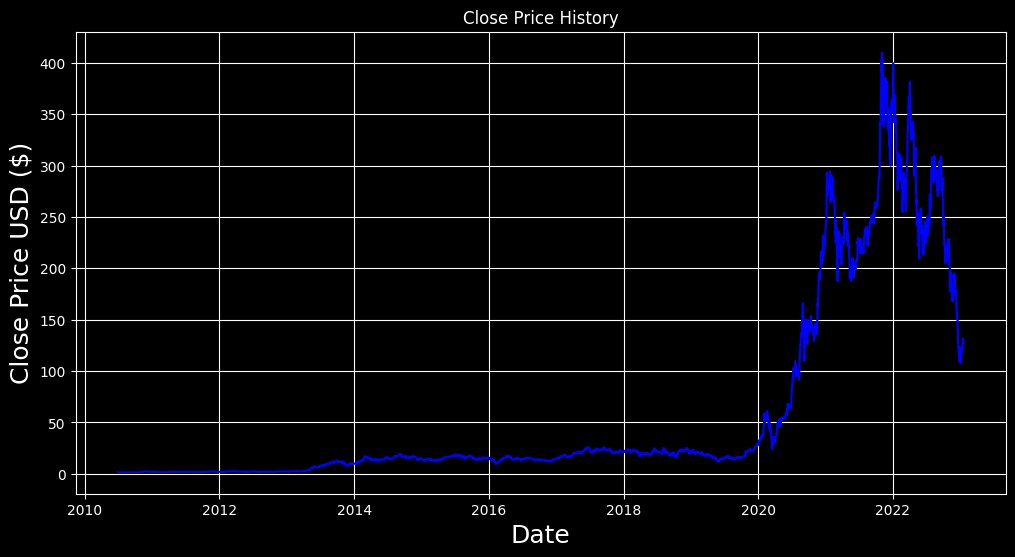

In [20]:

#plot of close price history

plt.figure(figsize=(12,6))
plt.style.use('dark_background')
plt.grid(True)
plt.title('Close Price History')
plt.plot(data['Close'], color='blue')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [28]:
#create a new dataframe with only the 'Close' column
data_close = data.filter(['Close'])
dataset = data_close.values
train_data_len = int(np.ceil( len(dataset) * .95 ))
train_data_len

3004

### Transform and split Data 

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler=MinMaxScaler(feature_range=(0,1))
scale_data=scaler.fit_transform(dataset)
scale_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.31898106],
       [0.31235378],
       [0.30841654]])

In [30]:
#split data
train=scale_data[0:train_data_len, :]
x_train=[]
y_train=[]
for i in range(60, len(train)):
    x_train.append(train[i-60:i, 0])
    y_train.append(train[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([1.31893376e-03, 1.30915182e-03, 1.00428041e-03, 5.54310983e-04,
       5.05408598e-05, 0.00000000e+00, 2.70634603e-04, 2.60852659e-04,
       2.03792133e-04, 3.81495821e-04, 6.58652535e-04, 6.66803340e-04,
       7.89077642e-04, 9.96129608e-04, 7.33645810e-04, 7.20604033e-04,
       8.47769306e-04, 8.95047888e-04, 8.39618501e-04, 7.74404725e-04,
       8.02119419e-04, 7.41799060e-04, 6.74954145e-04, 8.34727529e-04,
       1.00264927e-03, 8.90156916e-04, 7.58100670e-04, 6.17893619e-04,
       6.19524759e-04, 5.26596289e-04, 3.42368045e-04, 2.93458324e-04,
       4.10841653e-04, 4.85837374e-04, 5.46160178e-04, 4.84206234e-04,
       4.87468513e-04, 5.38006927e-04, 7.05931117e-04, 5.54310983e-04,
       6.68434479e-04, 6.43979619e-04, 6.35826368e-04, 6.63543507e-04,
       5.99960870e-04, 7.58100670e-04, 8.57551251e-04, 8.55920111e-04,
       7.72773586e-04, 8.31465251e-04, 8.00490725e-04, 7.12453228e-04,
       8.02119419e-04, 8.67333195e-04, 1.00754025e-03, 8.37987362e-04,
     

In [31]:
x_train, y_train = np.array(x_train), np.array(y_train)#convert to numpy arrays

In [32]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))#reshape the data
x_train.shape

(2944, 60, 1)

### Model Architecture

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [34]:

#Model

model=Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))

In [35]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])


In [36]:
model.fit(x_train, y_train, batch_size=1, epochs=15)

Epoch 1/15


2944/2944 [==============================] - 39s 12ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2/15
2944/2944 [==============================] - 34s 12ms/step - loss: 9.8918e-04 - mean_squared_error: 9.8918e-04
Epoch 3/15
2944/2944 [==============================] - 34s 12ms/step - loss: 5.2350e-04 - mean_squared_error: 5.2350e-04
Epoch 4/15
2944/2944 [==============================] - 35s 12ms/step - loss: 3.6928e-04 - mean_squared_error: 3.6928e-04
Epoch 5/15
2944/2944 [==============================] - 34s 11ms/step - loss: 3.4436e-04 - mean_squared_error: 3.4436e-04
Epoch 6/15
2944/2944 [==============================] - 34s 11ms/step - loss: 3.1717e-04 - mean_squared_error: 3.1717e-04
Epoch 7/15
2944/2944 [==============================] - 35s 12ms/step - loss: 3.3058e-04 - mean_squared_error: 3.3058e-04
Epoch 8/15
2944/2944 [==============================] - 33s 11ms/step - loss: 2.8772e-04 - mean_squared_error: 2.8772e-04
Epoch 9/15
2944/2944 [========

In [42]:
#test data set
test_data = scale_data[train_data_len - 60: , :]
x_test = []

y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [43]:
x_test = np.array(x_test)#convert to a numpy array

In [44]:
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))#reshape the data

In [45]:
predict=model.predict(x_test)
predict=scaler.inverse_transform(predict)

5/5 [==============================] - 1s 12ms/step


In [47]:
train=data_close[:train_data_len]
val=data_close[train_data_len:]
val['Predictions']=predict

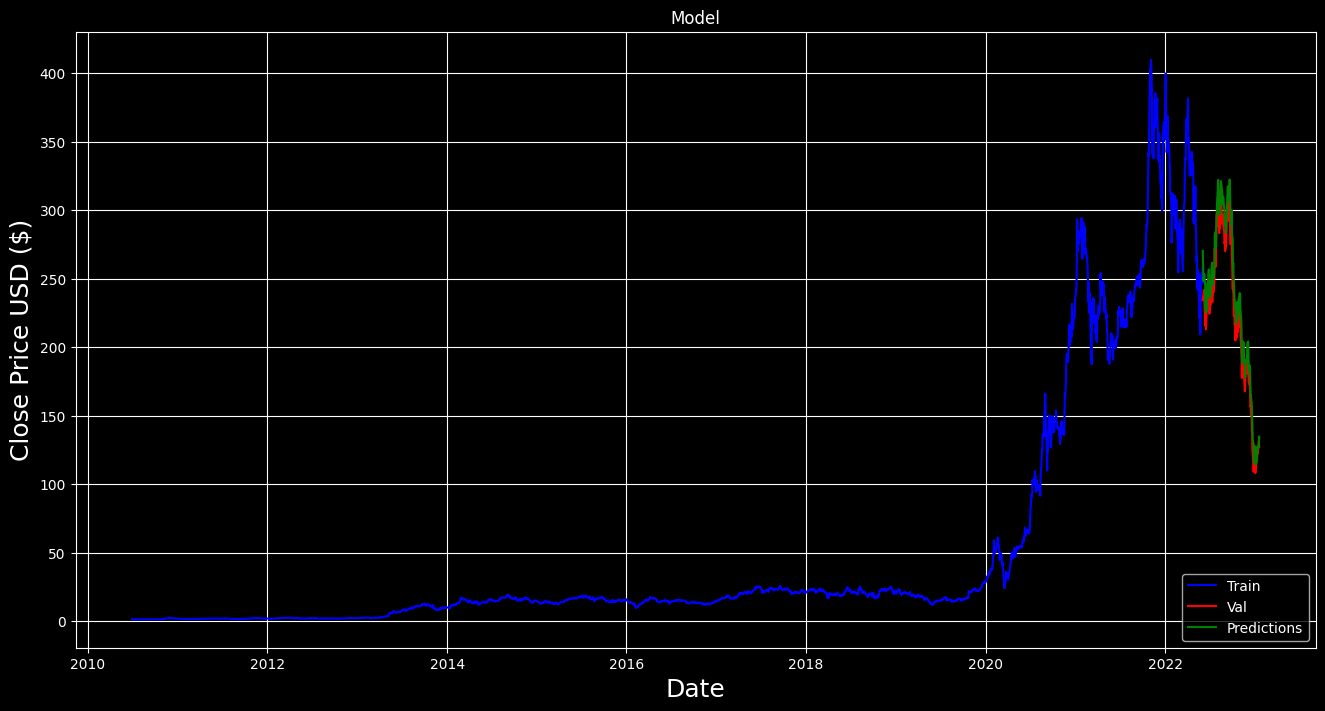

In [55]:

#plot for model prediction

plt.figure(figsize=(16,8))
plt.grid(True)
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], color='blue')
plt.plot(val[['Close']], color='red')
plt.plot(val[['Predictions']], color='green')
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [56]:
val#show the actual close and predicted prices

,Close,Predictions
Date,,
2022-06-03,234.516663,270.415863
2022-06-06,238.279999,248.412109
2022-06-07,238.886673,250.911682
2022-06-08,241.866669,250.441040
2022-06-09,239.706665,253.347733
...,...,...
2023-01-12,123.559998,126.902367
2023-01-13,122.400002,127.835709
2023-01-17,131.490005,126.938087


In [66]:
tesla_quote = pd.read_csv('tesla.csv')
new_data = tesla_quote.filter(['Close'])
last_60days = new_data[-60:].values
last_60days_scale = scaler.transform(last_60days)

X_test = []
X_test.append(last_60days_scale)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

pred_price= model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price

1/1 [==============================] - 0s 19ms/step


array([[132.08694]], dtype=float32)